<h1 style="color: #00BFFF;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.

- Your task is to develop the necessary code to accomplish each of these tasks effectively.

- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h2 style="color: #00BFFF;">Instructions:</h2>

- **Collaboration**: You are working in alone, so collaborate to create a comprehensive `README` file that outlines your project, methodologies, and findings.
- **Presentation**: Prepare and deliver a presentation that summarizes your analysis, demonstrating the depth and breadth of your work.
- **Python scripts**: You can use the this notebook or the `EDA_template` as template for your findings, but you'll have to deliver a different notebook to GitHub.
- **Extended Analysis**: Dive deeper into the data to uncover additional insights. Push the boundaries of your analysis to explore complex interactions within the portfolio.

<h1 style="color: #00BFFF;">Libraries</h1>

In [1]:
# Libraries 📚
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

<h1 style="color: #00BFFF;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #008080;">Data Loading</h3>

In [2]:
df = pd.read_csv('asset_price_data.csv')
df.head(5)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13


In [3]:
df_info = pd.read_csv('asset_information_data.csv')
df_info

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [4]:
df.shape

(783, 6)

In [5]:
df.dtypes

date       object
Asset1    float64
Asset2    float64
Asset3    float64
Asset4    float64
Asset5    float64
dtype: object

In [6]:
df.sample(10)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
43,2019-03-04,232.6784,62.158,28.389673,313.51,54.360
773,2021-12-20,252.9382,98.910,37.400000,342.12,66.600
768,2021-12-13,253.7250,101.977,37.830000,342.30,67.950
582,2021-03-26,252.8856,85.863,32.975796,339.30,58.270
60,2019-03-27,237.1800,62.258,29.022593,314.94,54.550
98,2019-05-20,237.1612,63.233,29.470069,317.25,53.430
532,2021-01-15,257.3475,82.230,31.628817,337.37,54.770
635,2021-06-09,250.1663,92.274,35.526770,342.92,65.460
50,2019-03-13,234.3044,62.623,28.678614,313.66,54.730
404,2020-07-21,252.3829,71.633,30.324915,320.36,45.675


In [7]:
df.isna().sum()

date       0
Asset1    13
Asset2    13
Asset3    13
Asset4    49
Asset5    20
dtype: int64

<h1 style="color: #00BFFF;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.

- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #008080;">Daily Returns Calculation.</h2>

In [8]:
# Calculate daily percentage returns for each asset
df_returns = df.copy()
assets = ['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']
for asset in assets:
    df_returns[f'{asset}_Return'] = df[asset].pct_change() * 100 #Calculate the percentage change. 

df_returns.head()

/var/folders/bs/hzz4qdm57z9cct0t_9rdynfr0000gn/T/ipykernel_2780/2370293976.py:5: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_returns[f'{asset}_Return'] = df[asset].pct_change() * 100 #Calculate the percentage change.
/var/folders/bs/hzz4qdm57z9cct0t_9rdynfr0000gn/T/ipykernel_2780/2370293976.py:5: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_returns[f'{asset}_Return'] = df[asset].pct_change() * 100 #Calculate the percentage change.
/var/folders/bs/hzz4qdm57z9cct0t_9rdynfr0000gn/T/ipykernel_2780/2370293976.py:5: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecat

,date,Asset1,Asset2,Asset3,Asset4,Asset5,Asset1_Return,Asset2_Return,Asset3_Return,Asset4_Return,Asset5_Return
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38,-0.273984,2.095422,2.525524,-0.112542,1.924221
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14,-0.151170,1.263162,-0.733753,0.185572,1.479175
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13,-0.153486,0.100285,0.703977,0.360533,-0.019179


<h2 style="color: #008080;">Correlation Matrix Calculation.</h2>

In [9]:
# Select only the return columns for correlation analysis
return_columns = [f'{asset}_Return' for asset in assets]
returns_data = df_returns[return_columns]

# Calculate the correlation matrix
correlation_matrix = returns_data.corr()

correlation_matrix


,Asset1_Return,Asset2_Return,Asset3_Return,Asset4_Return,Asset5_Return
Asset1_Return,1.000000,-0.088341,-0.061253,0.102252,-0.106484
Asset2_Return,-0.088341,1.000000,0.852491,0.526634,0.591399
Asset3_Return,-0.061253,0.852491,1.000000,0.511550,0.557414
Asset4_Return,0.102252,0.526634,0.511550,1.000000,0.421155
Asset5_Return,-0.106484,0.591399,0.557414,0.421155,1.000000


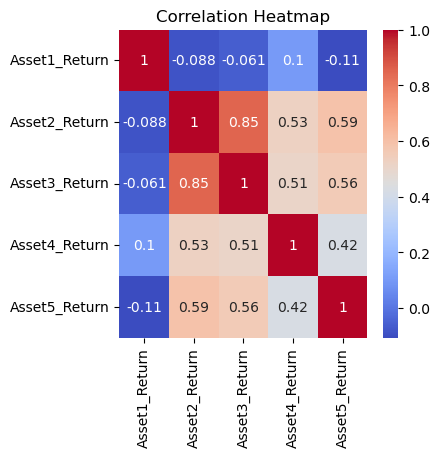

In [10]:
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(4, 4))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap")
plt.show()

<h2 style="color: #008080;">Scatter Plot between the Returns of Two Assets.</h2>

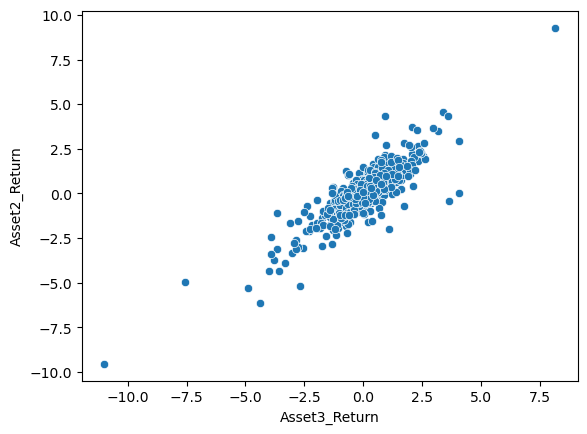

In [11]:
sns.scatterplot(data=df_returns, x='Asset3_Return', y='Asset2_Return')
plt.show()

<h1 style="color: #00BFFF;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.

- Plot the historical cumulative returns of the portfolio.

- Calculate the annualized return of the portfolio.

- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).

- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #008080;">Area Chart of Asset Weights.</h2>


In [12]:
df1 = pd.read_csv('portfolio_weights.csv')
df1.head(5)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [13]:
df1['Total'] = df1.drop(columns=['date']).sum(axis=1)
df1

,date,Asset1,Asset2,Asset3,Asset4,Asset5,Total
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974,1.0
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974,1.0
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974,1.0
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974,1.0
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974,1.0
...,...,...,...,...,...,...,...
778,2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356,1.0
779,2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356,1.0
780,2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356,1.0
781,2021-12-30,0.071307,0.266093,0.168775,0.33547,0.158356,1.0


<h2 style="color: #008080;">Chart of Historical Cumulative Returns of the Portfolio.</h2>


<h2 style="color: #008080;">Annualized Return.</h2>


<h2 style="color: #008080;">Annualized Volatility.</h2>

<h2 style="color: #008080;">Area Chart of Asset Weights Grouped by Family.</h2>